In [81]:
import torch
import torch.nn.functional as F

In [82]:
# replace following class code with an easy sequential network
class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden)   # hidden layer
        #self.predict = torch.nn.Linear(n_hidden, n_output)   # output layer

    def forward(self, x):
        x = F.relu(self.hidden(x))      # activation function for hidden layer
        #x = self.predict(x)             # linear output
        return x

In [83]:
net1 = Net(1, 1, 1)
net1

Net(
  (hidden): Linear(in_features=1, out_features=1, bias=True)
)

In [84]:
net1.hidden.weight

Parameter containing:
tensor([[0.1819]], requires_grad=True)

In [85]:
net1.hidden.bias

Parameter containing:
tensor([-0.9072], requires_grad=True)

In [86]:
tensor = torch.FloatTensor([1])
tensor

tensor([1.])

In [87]:
net1(tensor)

tensor([0.], grad_fn=<ReluBackward0>)

# 神經網路最基本的一個運算單元 y = xA+b 其中A代表權重(weight),b代表bias

也可以寫成 y = wx+b

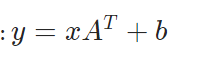

In [88]:
import numpy as np
A = net1.hidden.weight.detach().numpy()
b = net1.hidden.bias.detach().numpy()
A,b

(array([[0.18191493]], dtype=float32), array([-0.90724075], dtype=float32))

In [89]:
(1*A).T+b

array([[-0.7253258]], dtype=float32)

In [92]:
F.relu(torch.FloatTensor([-0.7253258]))

tensor([0.])

In [94]:
relu = lambda x:max(0,x)
relu(-0.7253258)

0

In [97]:
l = []
g = []
for i in np.arange(-10,10,1):
  l.append(relu(i))
  g.append(i)
l,g

([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [-10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

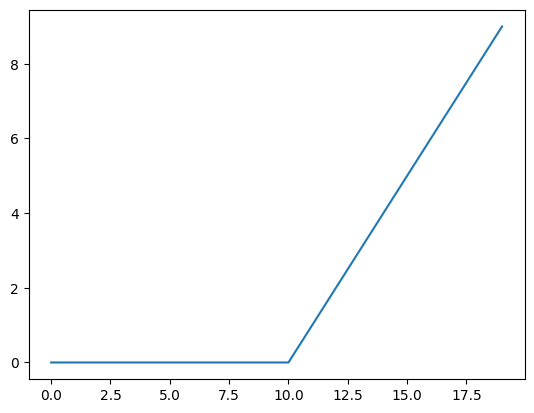

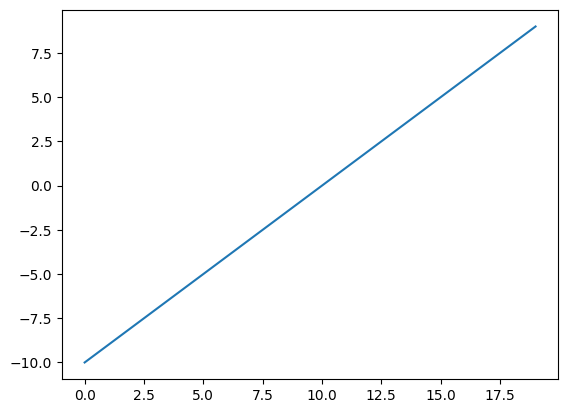

In [99]:
import matplotlib.pyplot as plt

plt.plot(l)
plt.show()
plt.plot(g)